In [23]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [42]:
train_data = pd.read_csv("data/train.csv")
train_data.drop(['Unnamed: 0'], axis=1, inplace=True)

valid_data = pd.read_csv("data/val.csv")
valid_data.drop(['Unnamed: 0'], axis=1, inplace=True)

#concat train and valid data
train_data = pd.concat([train_data, valid_data])

test_data = pd.read_csv("data/test.csv")
test_data.drop(['Unnamed: 0'], axis=1, inplace=True)
test_data

,Open
0,0.511158
1,0.512632
2,0.518842
3,0.514526
4,0.522105
...,...
386,0.661579
387,0.662105
388,0.700526
389,0.722105


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-13662.041, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-13689.782, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-13691.473, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-13663.236, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-13690.877, Time=0.53 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-13690.582, Time=0.37 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-13687.703, Time=0.79 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-13692.415, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-13691.740, Time=0.33 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-13691.487, Time=0.28 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-13690.767, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-13689.409, Time=0.60 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 3.868 seconds
                               SARIMAX Results                  

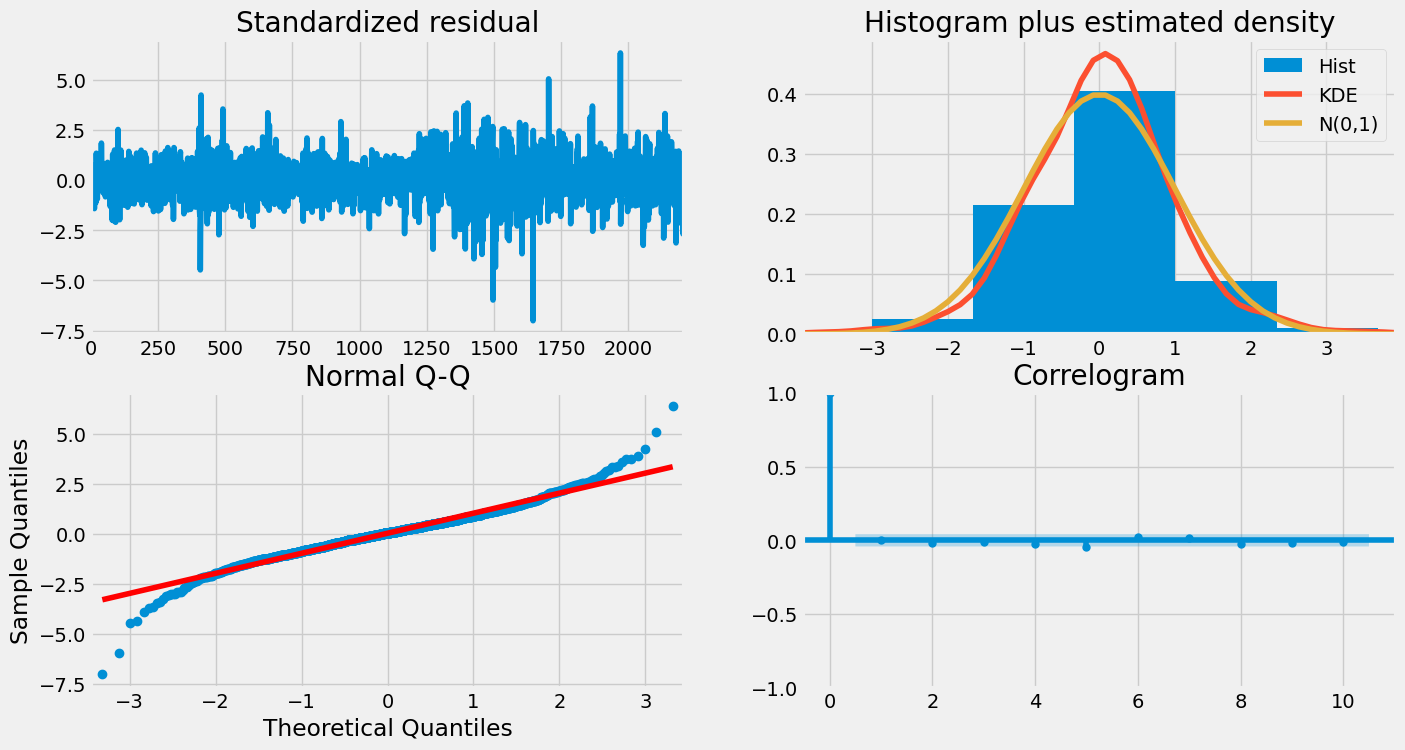

In [43]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [45]:
model = ARIMA(train_data, order=(1,1,2))  
fitted = model.fit()  
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                 2209
Model:                 ARIMA(1, 1, 2)   Log Likelihood                6848.704
Date:                Mon, 15 Apr 2024   AIC                         -13689.409
Time:                        21:13:08   BIC                         -13666.609
Sample:                             0   HQIC                        -13681.079
                               - 2209                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0596      0.813     -0.073      0.942      -1.653       1.534
ma.L1         -0.0602      0.814     -0.074      0.941      -1.655       1.535
ma.L2         -0.0290      0.102     -0.284      0.7

In [48]:
fc = fitted.forecast(391, alpha=0.05)  # 95% conf|

In [58]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))

MSE: 0.03683964100112043
